In [1]:
from scipy import stats
import math

In [2]:
from matplotlib import pyplot as plt
import plotly
import seaborn as sns

%matplotlib inline

In [3]:
%reload_ext nb_black
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>

In [4]:
url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv"
df = pd.read_csv(url)

<IPython.core.display.Javascript object>

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>

# Assignment

For this assignment, you are going to apply statistical inference on [Titanic dataset](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv).


Try to answer the following questions. Include a hypothesis and the test assumptions. **If the assumptions are valid**, try to conduct the t-test and addditionally calculate manually the 95% confidence interval which is derived from the hypothesis that you try to evaluate. Also try to come up with some valid findings from the data.



1. Is it true that the younger a passenger was, they had more chance of survival? Is this difference statistically important? 
2. Is there a correlation between fare price and survival? Again, is this difference statistically important?

As you are conducting the analysis, consider what other variables may be accounting for any significant differences you find. 

More specifically, the tasks that you need to enounter in your deliverables are:

1. Familiarize yourself with the dataset. Review the structure of it and focus on the fields necessary to answer the above mentioned questions.

2. State the null and the alternative hypotheses that address the questions.

3. Manipulate the dataset accordingly in order to prepare it for the statistical tests.

4. Perform an exploratory analysis with summary statistics and corresponding visualizations, in order to gain a clearer view about the distributions of the samples. Focus on their differences.

5. Perform the necessary normality checks in order to make sure that you can conduct the statistical tests.

6. Apply t-test statistic if you pass successfully the normality checks

7. For this exercise, you will also need to write a function to calculate the confidence interval using the standard error for comparing two means (used in t-statistic):

$$
    \bar{X_1} - \bar{X_2} \pm z*\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}
$$

- $z$ is the critical value
- $s_1$ sample 1 standard deviation
- $s_2$ sample 2 standard deviation

- Let $z=1.96$ for a 95% confidence level

- Use the following method signature:

    `def get_95_ci(data1, data2)`
    

8. Elaborate on the results of your analyses.

## Confidence Interval function

In [21]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt(
        (sample_1_var / sample_1_n) + (sample_2_var / sample_2_n)
    )
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return (
        "The difference in means at the 95% confidence interval (two-tail) is between "
        + str(ci_lower)
        + " and "
        + str(ci_upper)
        + "."
    )

<IPython.core.display.Javascript object>

## Is it true that the younger a passenger was, they had more chance of survival? Is this difference statistically important? 

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>

In [8]:
dead = df[df.Survived == 0]
alive = df[df.Survived == 1]

<IPython.core.display.Javascript object>

H_o = the avg ages of passengers that survived and didn't is not statistically significant.

H_a = the difference in avg age of non survivors and survivors is statistically significant.

C:\Users\tayma\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tayma\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


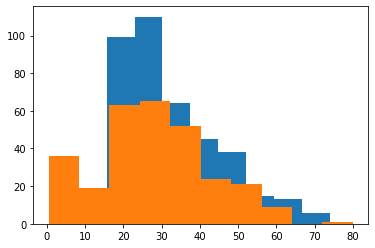

<IPython.core.display.Javascript object>

In [9]:
plt.hist(dead.Age)
plt.hist(alive.Age)
plt.show()

In [10]:
print(stats.describe(alive.Age, nan_policy="omit").kurtosis)
print(stats.describe(dead.Age, nan_policy="omit").kurtosis)

-0.07723188107788737
0.2652058747777075


<IPython.core.display.Javascript object>

The kurtosis values are very low which makes them not viable for t-testing

In [25]:
get_95_ci(alive.Age, dead.Age)

'The difference in means at the 95% confidence interval (two-tail) is between 0.303526268311628 and 4.26145291190958.'

<IPython.core.display.Javascript object>

With 95% confidence the passengers that survived were on average from -4.28 to -0.33 years younger.

## Is there a correlation between fare price and survival? Again, is this difference statistically important?

H_o = there is no difference in survival rate of passengers with higher and lower fare price.
H_a = there is a difference in survival rate between passengers of higher vs. lower fare price.

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>

In [13]:
t, p = stats.ttest_ind(alive.Fare, dead.Fare)
print(t)
print(p)

7.939191660871055
6.120189341924198e-15


<IPython.core.display.Javascript object>

In [24]:
get_95_ci(dead.Fare, alive.Fare)

'The difference in means at the 95% confidence interval (two-tail) is between 18.746713127616722 and 33.80832830656986.'

<IPython.core.display.Javascript object>

In [20]:
# With 95% confidence, the average fare of survivors was $93.43 to $108.49 more expensive than those who died.

<IPython.core.display.Javascript object>